In [1]:
from sqlalchemy import create_engine
import requests
from datetime import datetime
import time

ImportError: No module named sqlalchemy

In [2]:
url = "https://api.marquee.gs.com/v1/assets"
parameters = {
        "Authorization":"f1BaflTxIeQ3zXS6tyXEtsGRFPBa" 
    }

rawData = requests.get(url, params=parameters).json()
rawData

{'statusCode': 401,
 'reasonPhrase': 'Unauthorized',
 'title': 'Missing Authentication Token',
 'messages': ['This router uses reftoken authentication, and the request did not include an authentication token.']}

In [11]:
import requests
import json

client_id = r'c8efe4a2f6c64b098f1d09d455db5f75'
client_secret = r'42ab234c49f7989c734efe6f180e38927dc45335365e2ce2397d9b204a9acc06'

auth_data = {
    'grant_type'    : 'client_credentials',
    'client_id'     : 'c8efe4a2f6c64b098f1d09d455db5f75',
    'client_secret' : '42ab234c49f7989c734efe6f180e38927dc45335365e2ce2397d9b204a9acc06',
    'scope'         : 'read_content read_financial_data read_product_data read_user_profile'
}

# create session instance
session = requests.Session()

# make a POST to retrieve access_token
# auth_request = session.post('https://idfs.gs.com/as/token.oauth2', data = auth_data)
# access_token_dict = json.loads(auth_request.text)
# access_token = access_token_dict['access_token']


In [27]:
# update session headers
session.headers.update({'Authorization':'Bearer '+ 'f1BaflTxIeQ3zXS6tyXEtsGRFPBa'})

# test API connectivity
request_url = 'https://api.marquee.gs.com/v1/ideas'
request = session.get(url=request_url)
request.json()

{'statusCode': 401,
 'reasonPhrase': 'Unauthorized',
 'title': 'Missing OAuth2 Scope',
 'messages': ["Scopes [read_product_data, ] in the request for user '' are not sufficient to access endpoint Get many trade ideas (API: Trade Idea Service)."]}

In [23]:
request.json()

{'assetClass': 'Equity',
 'classifications': {'riskCountryName': 'United States',
  'riskCountryCode': 'US',
  'countryName': 'United States',
  'countryCode': 'US',
  'isPrimary': True},
 'currency': 'USD',
 'description': '',
 'domains': {},
 'exchange': 'NYSE',
 'id': 'MA4B66MW5E27U8P32SB',
 'identifiers': [{'type': 'MDAPI', 'value': '.SPX'},
  {'type': 'GSID', 'value': '100'},
  {'type': 'GSS', 'value': 'SPX'},
  {'type': 'CUS', 'value': '648815108'},
  {'type': 'PRIMEID', 'value': '1000043264'},
  {'type': 'GSN', 'value': '152850'},
  {'type': 'WPK', 'value': '969003'},
  {'type': 'RCIC', 'value': '.SPX'},
  {'type': 'BID', 'value': 'SPX'},
  {'type': 'ISN', 'value': 'US6488151084'},
  {'type': 'RIC', 'value': '.SPX'},
  {'type': 'SECNAME', 'value': '.SPX'},
  {'type': 'TKR', 'value': 'SPX'},
  {'type': 'DELISTED', 'value': 'no'},
  {'type': 'EID', 'value': '0'}],
 'lastUpdatedById': '3549cd2c46c3468bae0d90b1f2b9e609',
 'lastUpdatedTime': '2019-07-02T07:30:52.215Z',
 'listed': Tru

In [33]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
client_id = r'fd388b96c2804acc849e66d03c898c07'
client_secret = r'6971e5936216cae8695169ea88f866b0e6e277069f58419bff49d9c131ca8510'

auth_data = {
    'grant_type'    : 'client_credentials',
    'client_id'     : client_id,
    'client_secret' : client_secret,
    'scope'         : 'read_content read_financial_data read_product_data read_user_profile'
}

# create session instance
session = requests.Session()

# update session headers
session.headers.update({'Authorization':'Bearer '+ '56xlmtJK8dcsTty7ejMKkpRwFI8y'})
asset_id = 'MA4B66MW5E27U8P32SB'

request_url = "https://api.marquee.gs.com/v1/data/TREOD/query"

request_query = {
                    "where": {
                        "assetId": ["MA4B66MW5E27UANEQ6Q"]
                    },
                    "startDate": "2017-01-15",
                    "endDate":"2018-01-15"
               }

request = session.post(url=request_url, json=request_query)
results = json.loads(request.text)
table = pd.DataFrame(results['data'])

In [78]:
table

,adjustedAskPrice,adjustedBidPrice,adjustedHighPrice,adjustedLowPrice,adjustedOpenPrice,adjustedTradePrice,adjustedVolume,askPrice,assetId,bidPrice,date,highPrice,lowPrice,openPrice,tradePrice,updateTime,volume
0,235.84,235.75,239.9600,234.370,236.70,235.58,4617522.0,235.84,MA4B66MW5E27UANEQ6Q,235.75,2017-01-17,239.9600,234.370,236.70,235.58,2017-01-18T02:40:00Z,4617522.0
1,238.35,238.31,239.7100,235.580,236.65,238.36,3768967.0,238.35,MA4B66MW5E27UANEQ6Q,238.31,2017-01-18,239.7100,235.580,236.65,238.36,2017-01-19T02:33:00Z,3768967.0
2,243.76,243.62,248.6800,240.750,247.25,243.76,7732303.0,243.76,MA4B66MW5E27UANEQ6Q,243.62,2017-01-19,248.6800,240.750,247.25,243.76,2017-01-20T02:28:00Z,7732303.0
3,244.71,244.59,246.0000,243.010,245.46,244.73,4204275.0,244.71,MA4B66MW5E27UANEQ6Q,244.59,2017-01-20,246.0000,243.010,245.46,244.73,2017-01-21T03:14:00Z,4204275.0
4,248.92,248.86,250.8899,245.500,245.85,248.92,6262938.0,248.92,MA4B66MW5E27UANEQ6Q,248.86,2017-01-23,250.8899,245.500,245.85,248.92,2017-01-24T02:43:00Z,6262938.0
5,254.59,254.52,254.8000,249.650,250.00,254.61,4965451.0,254.59,MA4B66MW5E27UANEQ6Q,254.52,2017-01-24,254.8000,249.650,250.00,254.61,2017-01-25T02:44:00Z,4965451.0
6,254.40,254.31,258.4600,251.800,257.31,254.47,5146361.0,254.40,MA4B66MW5E27UANEQ6Q,254.31,2017-01-25,258.4600,251.800,257.31,254.47,2017-01-26T02:39:00Z,5146361.0
7,252.49,252.42,255.7400,250.750,254.29,252.51,3152123.0,252.49,MA4B66MW5E27UANEQ6Q,252.42,2017-01-26,255.7400,250.750,254.29,252.51,2017-01-27T02:43:00Z,3152123.0
8,252.96,252.87,253.0000,248.520,251.38,252.95,3166336.0,252.96,MA4B66MW5E27UANEQ6Q,252.87,2017-01-27,253.0000,248.520,251.38,252.95,2017-01-28T03:10:00Z,3166336.0
9,250.64,250.62,255.2899,247.100,252.53,250.63,3801074.0,250.64,MA4B66MW5E27UANEQ6Q,250.62,2017-01-30,255.2899,247.100,252.53,250.63,2017-01-31T02:45:00Z,3801074.0


In [84]:
tableNew = table[['date', 'adjustedAskPrice', 'adjustedTradePrice', 'askPrice']]
# tableNew

tableNew[['date', 'adjustedAskPrice', 'adjustedTradePrice', 'askPrice']] = tableNew['adjustedAskPrice'].apply(lambda x: 10 * x)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: Must have equal len keys and value when setting with an iterable

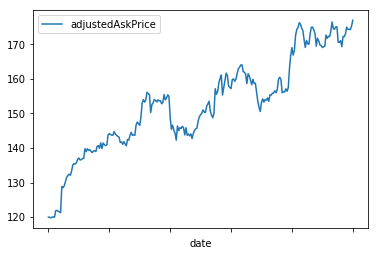

In [46]:
ax = tableNew.plot(x="date", y="adjustedAskPrice")
plt.show()

In [48]:
ax = tableNew.plot(x="date", y="adjustedAskPrice", figsize=(200,200))
tableNew.plot(x="date", y="adjustedTradePrice", ax=ax, color="C2", figsize=(200,200))

plt.show()

In [58]:
request_url = "https://api.marquee.gs.com/v1/data/TREOD/query"

request_query = {
                    "where": {
                        "assetId": ["MA4B66MW5E27U8P32SB"]
                    },
                    "startDate": "2017-01-15",
                    "endDate":"2018-01-15"
               }

request = session.post(url=request_url, json=request_query)
results = json.loads(request.text)
table2 = pd.DataFrame(results['data'])

In [61]:
table2 = table2[['date', 'adjustedAskPrice', 'adjustedTradePrice', 'askPrice']]
table2

,date,adjustedAskPrice,adjustedTradePrice,askPrice
0,2017-01-17,2290.42,2267.89,2290.42
1,2017-01-18,2295.95,2271.89,2295.95
2,2017-01-19,2289.52,2263.69,2289.52
3,2017-01-20,2293.50,2271.31,2293.50
4,2017-01-23,2289.54,2265.20,2289.54
5,2017-01-24,2301.90,2280.07,2301.90
6,2017-01-25,2319.80,2298.37,2319.80
7,2017-01-26,2315.32,2296.68,2315.32
8,2017-01-27,2315.66,2294.69,2315.66
9,2017-01-30,2301.92,2280.90,2301.92


In [72]:
chart = tableNew.plot(x="date", y="adjustedAskPrice", linewidth=10)
table2.plot(x="date", y="adjustedAskPrice", ax=chart, figsize=(50,50), linewidth=10)

plt.show()

KeyError: 'adjustedAskPriceadjustedAskPriceadjustedAskPriceadjustedAskPriceadjustedAskPriceadjustedAskPriceadjustedAskPriceadjustedAskPriceadjustedAskPriceadjustedAskPrice'